# Data Science Nano Degree - Project 1: AirnBnB data in Seatlle

#### Import all packages used in this notebook

In [45]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #split
from sklearn.metrics import r2_score, mean_squared_error #metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt

#### Read in the Calendar and Listings data for Seatle

Clean the data and begin data exporations

In [46]:
seatle_calendar = pd.read_csv("Seatle_calendar.csv")
seatle_listings = pd.read_csv("Seatle_listings.csv")

In [49]:
seatle_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [50]:
seatle_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [51]:
seatle_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

### Business and Data Understanding

The seatle_listings data contains listings information for properties in Seatle - this includes the price (we'll call this listing price) of the propertie along with the characteritics of the property and property review information. The seatle_calendar dataset contains availabilty information about the properties over time along with a price (we'll call this calendar price). In the seatle_calendar dataset the price is only populated when the property is available (unoccupied). Using this available data a number of questions are to be explored:

1. Are there any variations in price and occupancy over time? 
2. What factors could influence price and occupancy rates?
3. Are we able to build a reasonable model to predict price? Is there any difference in the listing and calendar price? 
4. Can the models give us any indication of how appropriately the properites are priced (i.e for the available properties)? 

These questions will be attempted to be answered in the subsequent analysis. A scan of the columns in the listing data gave a focus on the following varaibles to be analysed in predicting price: 'property_type', 'room_type', 'accommodates','bathrooms', 'bedrooms', 'beds', 'bed_type','neighbourhood_cleansed'



### Data Preparation

The next sections prepare the data in order to answer the questions posed above. 

In [53]:
# Fix the price column on each of the datasets
seatle_calendar['price_c'] = seatle_calendar['price'].str.replace("[$, ]", "").astype("float")
seatle_listings['price_l'] = seatle_listings['price'].str.replace("[$, ]", "").astype("float")

In [54]:
# Going to focus on these specific variables
seatle_listings[['property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type','neighbourhood_cleansed']]

,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,neighbourhood_cleansed
0,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,West Queen Anne
1,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,West Queen Anne
2,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,West Queen Anne
3,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,West Queen Anne
4,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,West Queen Anne
...,...,...,...,...,...,...,...,...
3813,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,Fremont
3814,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,Portage Bay
3815,House,Entire home/apt,2,1.0,1.0,1.0,Real Bed,Rainier Beach
3816,Condominium,Entire home/apt,2,1.0,0.0,1.0,Real Bed,Madison Park


Data Prep:

- join the listings and calendar data together by id
- create a year_month field to analyse trends by month
- create a variable in order to analyse the availability of a property each month. This variable is created to show the average availablity of a specific property for a month
- check the frequecy distrubution of listings by month


In [55]:

listing_prices = seatle_listings[['price_l','id','property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type','neighbourhood_cleansed']]

price_checks = seatle_calendar.merge(listing_prices,how='inner',left_on = 'listing_id',right_on = 'id')

#price_checks = price_checks.dropna(subset=['price'],axis=0)
price_checks['Price_Diff'] = price_checks['price_c'] - price_checks['price_l']
price_checks['year_month'] = (price_checks['date'].str[0:4]+price_checks['date'].str[5:7]).astype(str)
price_checks['unavailable_ind'] = price_checks['available']=='f'

avail_id_date = pd.DataFrame(price_checks.groupby(['listing_id','year_month'])['unavailable_ind'].mean())
avail_id_date.columns = ['Occupancy']
price_checks1 = price_checks.set_index(['listing_id','year_month'])
price_checks2 = price_checks1.join(avail_id_date)
price_checks2

freq1 = pd.DataFrame(price_checks['year_month'].value_counts())
freq1

,year_month
201603,108438
201605,108438
201607,108407
201608,108407
201610,108407
201612,108407
201604,104940
201606,104929
201611,104910
201609,104910


A count of the data by month shows a lot less properties for 201701 than the other months - due to this, this month of data will be excluded from the analysis. 

In [56]:
## Low volume in 201701 - drop this month
price_checks2 = price_checks2.reset_index()
price_checks3 = price_checks2.loc[price_checks2['year_month'] != '201701']

In order to get the data ready for any modelling - the any missing values need to be dealt with - first see which columns of interest have missing values

In [57]:
# Get the data ready for modelling

# Focus variables accommodates, room_type, bathrooms, bedrooms, beds, neighbourhood_cleansed

#Check which columns of interest have missing values

model_list = ['accommodates','room_type','bathrooms','bedrooms','beds','neighbourhood_cleansed']

for var in model_list:
    print(price_checks3[var].isna().sum())

0
0
5808
2178
363
0


'bathrooms','bedrooms','beds' have missing data. All these variables are numeric variable types. There are a number of options for dealing with the missing values here:  

- drop these instances 
- fill these instances with a mean or median value
- build a model from the other variables to predict missing value

Dropping these cases won't be the best solution as information might then be lost (there might be a reason this information is not included). Building a model to predict the missings is a sensible solution but may be a bit over-complicated here. The best option is to fill the missings with the mean or the median. 

Lets run some summary statistics on each of these variables to determine is the median or mean will be better to fill the missings with. 

In [23]:
### Bathrooms, Bedrooms and beds have missing information
missing_list = ['bathrooms','bedrooms','beds']
for var in missing_list:
    print(price_checks3[var].describe())

count    1.263771e+06
mean     1.250613e+00
std      5.741332e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      8.000000e+00
Name: bathrooms, dtype: float64
count    1.267401e+06
mean     1.306175e+00
std      8.851779e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      7.000000e+00
Name: bedrooms, dtype: float64
count    1.269216e+06
mean     1.735887e+00
std      1.128599e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      1.500000e+01
Name: beds, dtype: float64


The median for each of these variables is 1 - the mean is just above 1 - you can't have 1.3 bathrooms etc so the median seems to be a logical choice. Filling each of these with 1 is also logical since a property should have at least a bedroom, bed and toilet (but you never know - and this is the assumption you make when imputing missing values!!). 

The missings are filled in below and then checked that the imputation has done its job.

In [58]:
## The median of each of these vairables is 1 - this seems like a reasonable value to fill hte missings with

def fill_with_medain(var):
    """The purpose of this function is to fill missing values in the specified column (var) in the dataframe price_checks3 with its median
    arugment: var (the column to to fill missings with the median of that column)
    """
    return price_checks3[var].fillna(price_checks3[var].median(),inplace=True)

fill_with_medain('beds')
fill_with_medain('bathrooms')
fill_with_medain('bedrooms')

for var in model_list:
    print(price_checks3[var].isna().sum())

0
0
0
0
0
0


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


#### Q1: Are there any variations in price and occupancy over time? 

Question 1 can be answered by just doing simple plots of the price and occupancy over time.


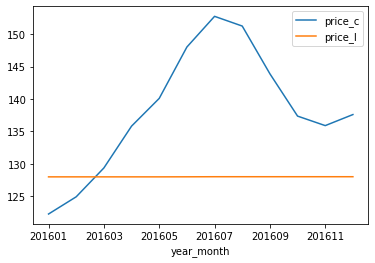

In [59]:
#Check differences between listed and calendar price

ave0 = price_checks3.groupby('year_month')[['price_c','price_l']].mean()
ave0.plot()

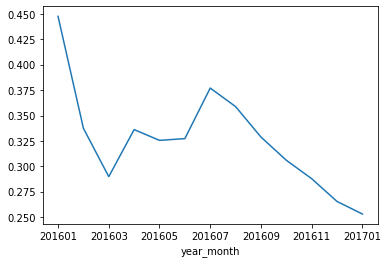

In [60]:
ave_not_avail = price_checks2.groupby('year_month')['unavailable_ind'].mean()
ave_not_avail.plot()

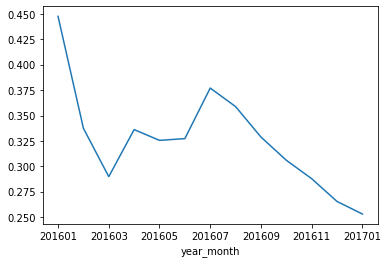

In [61]:
occupancy = price_checks2.groupby('year_month')['Occupancy'].mean()
occupancy.plot()

Q1 Answer: calendar prices are only populated for properties which are available for rent. There does appear to be calandar higher prices during the summer months. There also appears to be higher occupnacy of properties over this period. Higher demand over the summer months appears to link higher prices. 

#### Q2: What variables inlfuence Price and Occupancy rates?
This can also be answered by plotting the variables against the price and occupancy rate.

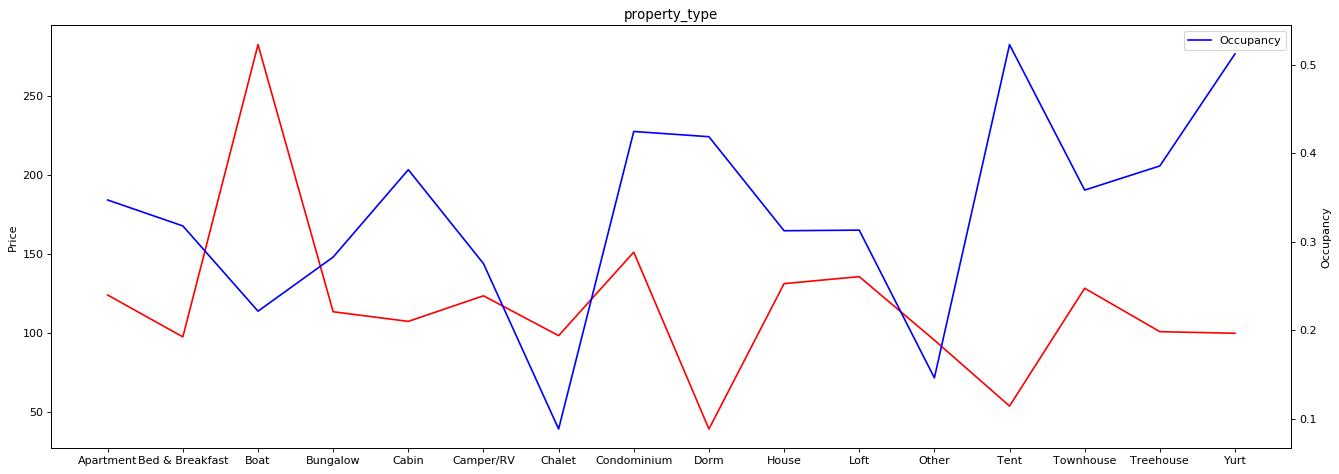

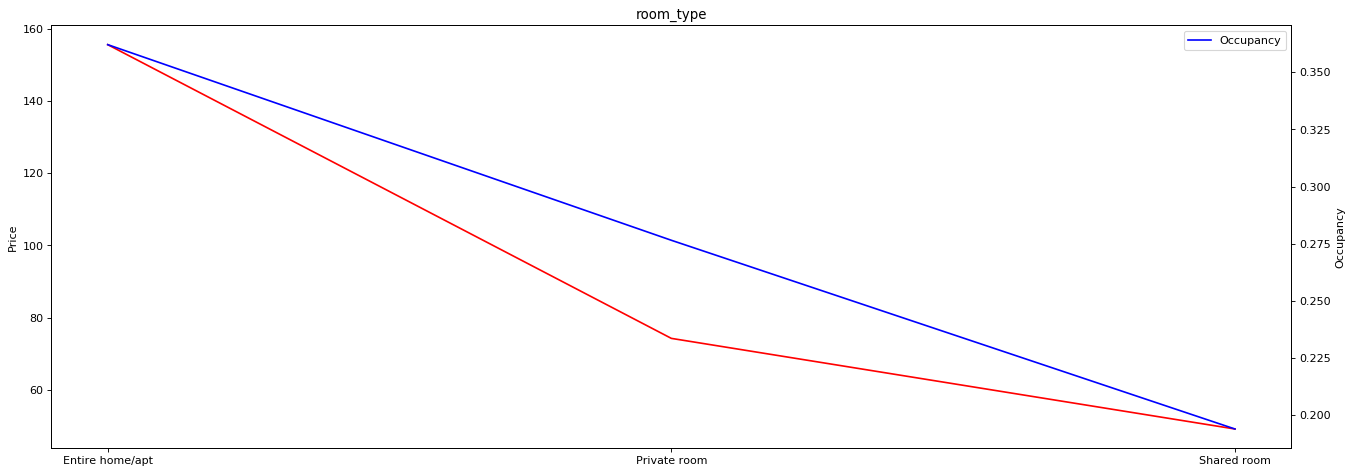

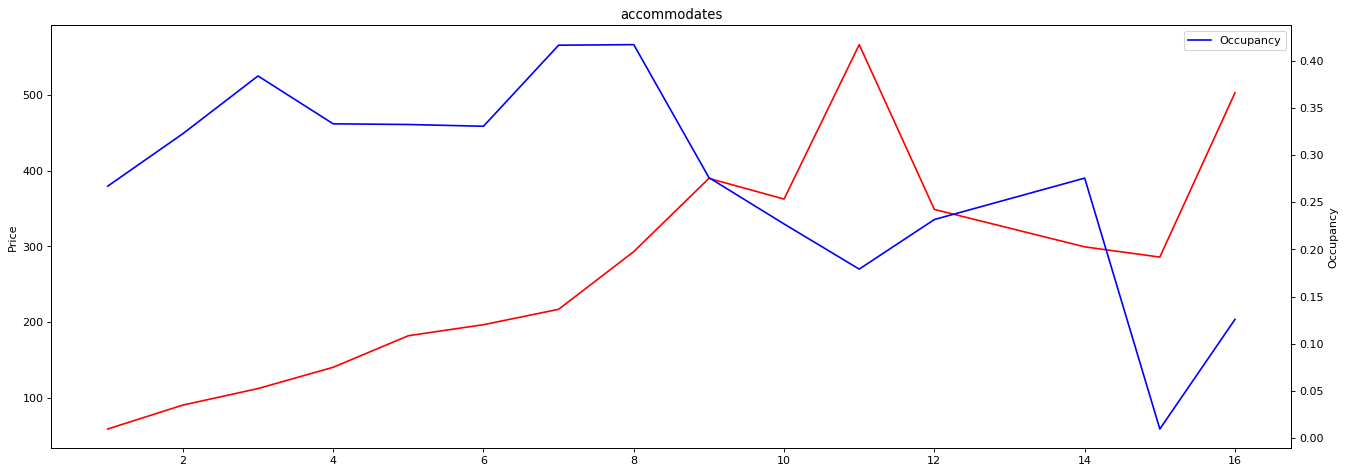

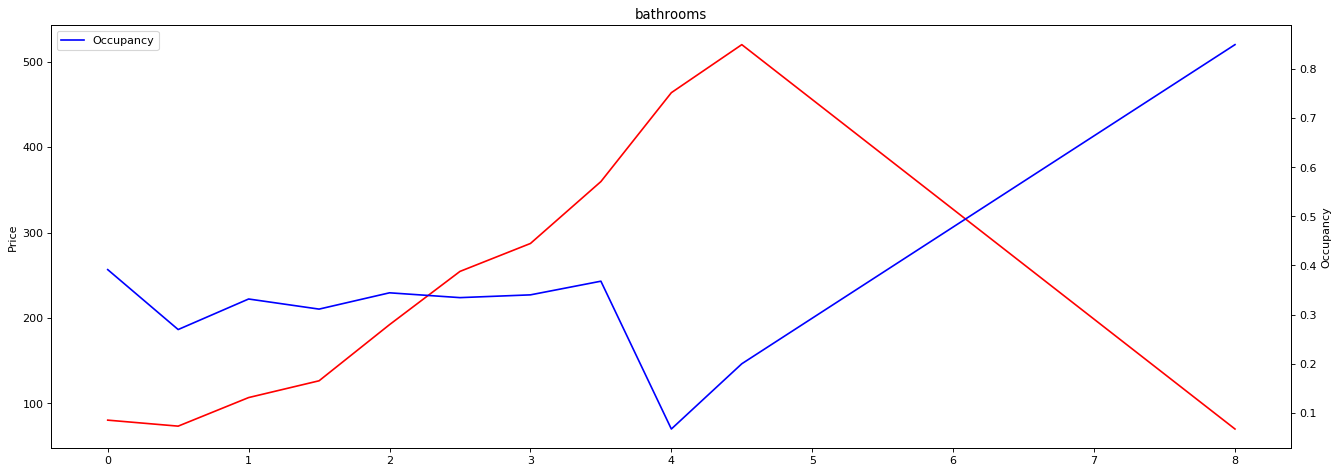

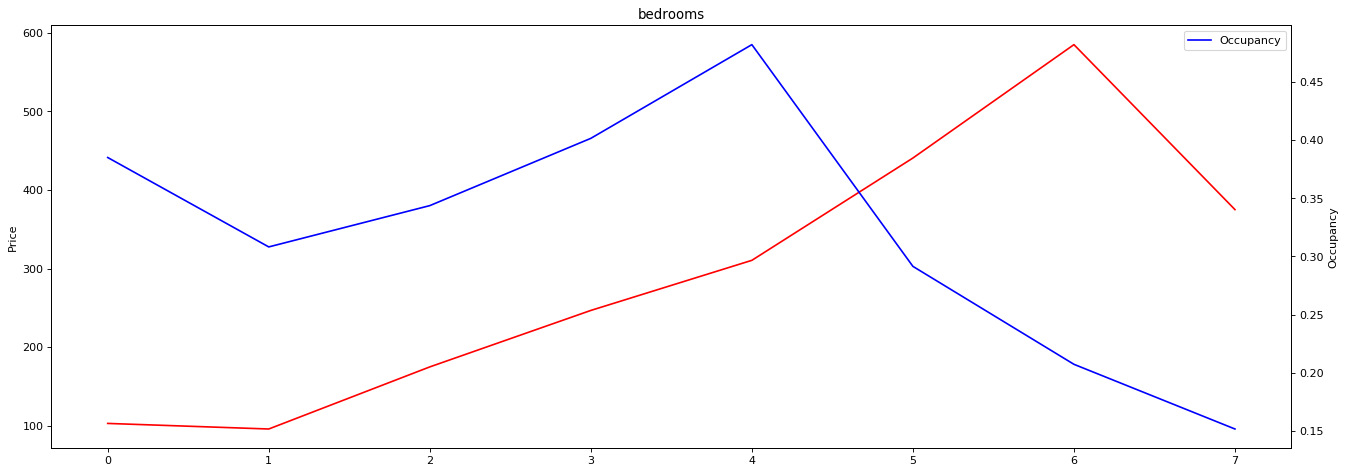

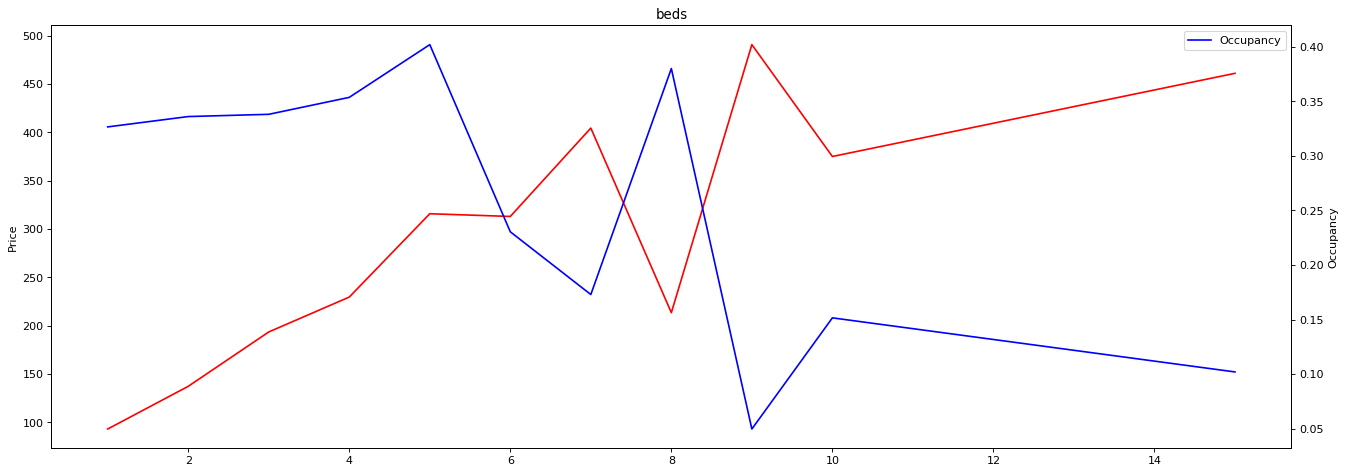

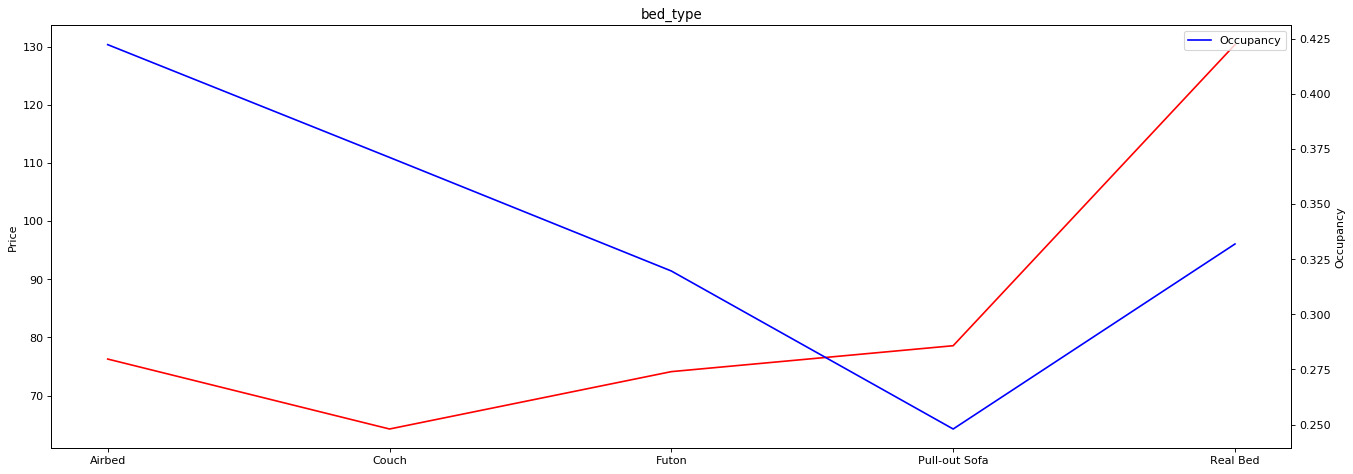

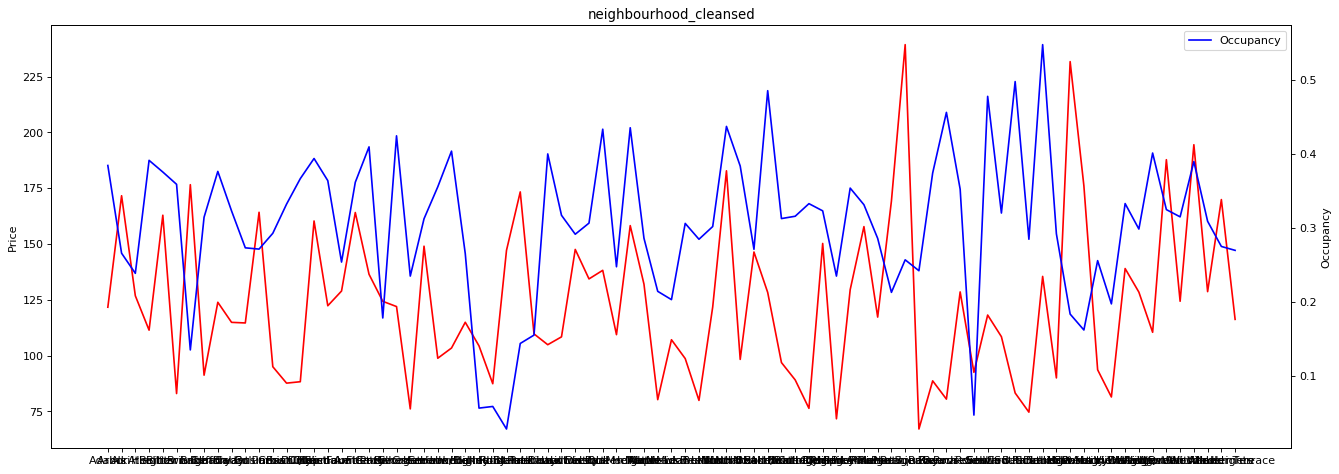

In [62]:
#Plots

var_list = ['property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type','neighbourhood_cleansed']

for var in var_list:
    plots1 = price_checks3.groupby(var)['price_l'].mean()
    plots2 = price_checks3.groupby(var)['Occupancy'].mean()
    
    fig, ax1 = plt.subplots(1,1,figsize=(20,7), dpi= 80)
    ax1.plot(plots1,color = 'r',label="Price")
    ax1.set_ylabel('Price')
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.plot(plots2,color='b',label='Occupancy')
    ax2.set_ylabel('Occupancy')
    plt.title(var)
    plt.legend()


Comments: The plots above show the price and occupancy relationships with a specific set of varaibles. Number of bathrooms, bedrooms appears to show a good relationship with listing price. Room type also looks promising. It will be good to see how the variables are populated by volume - this is shown below and can be used to further narrow down variables. 

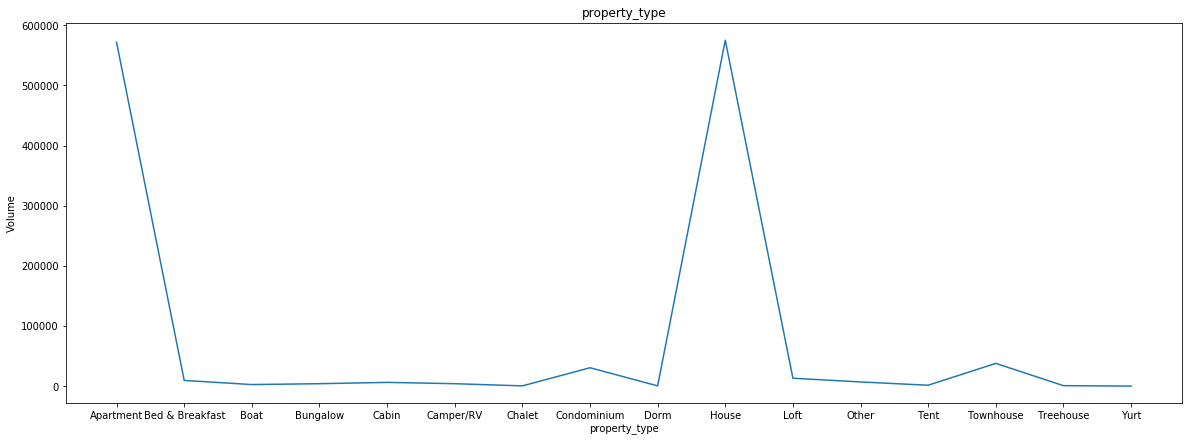

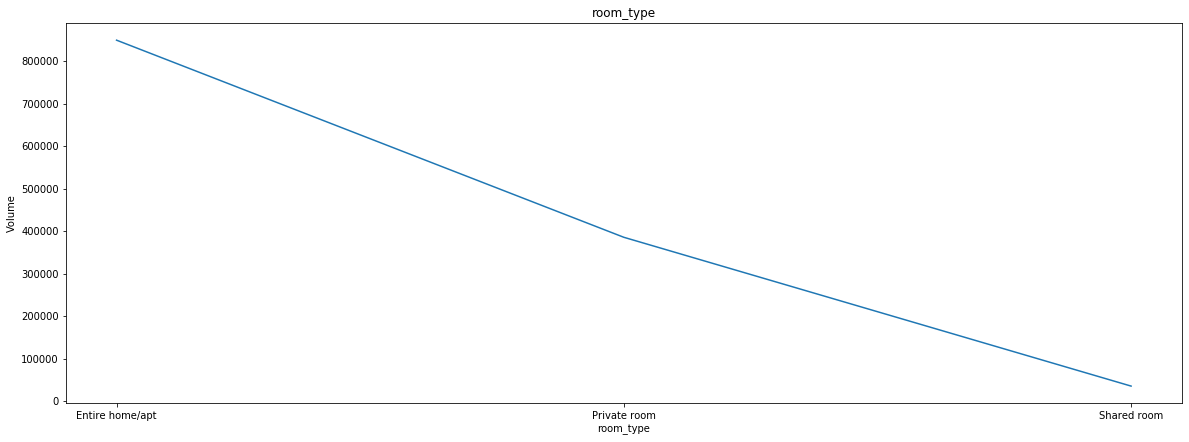

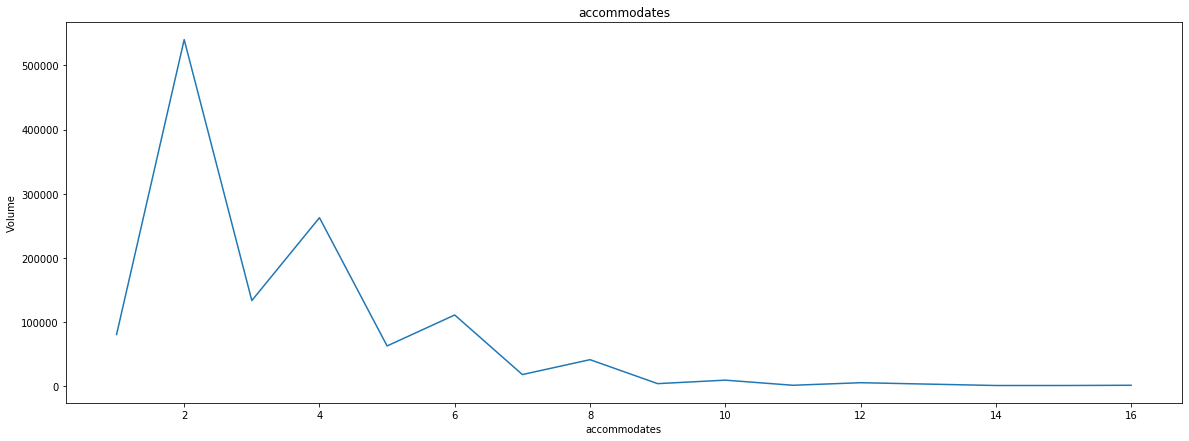

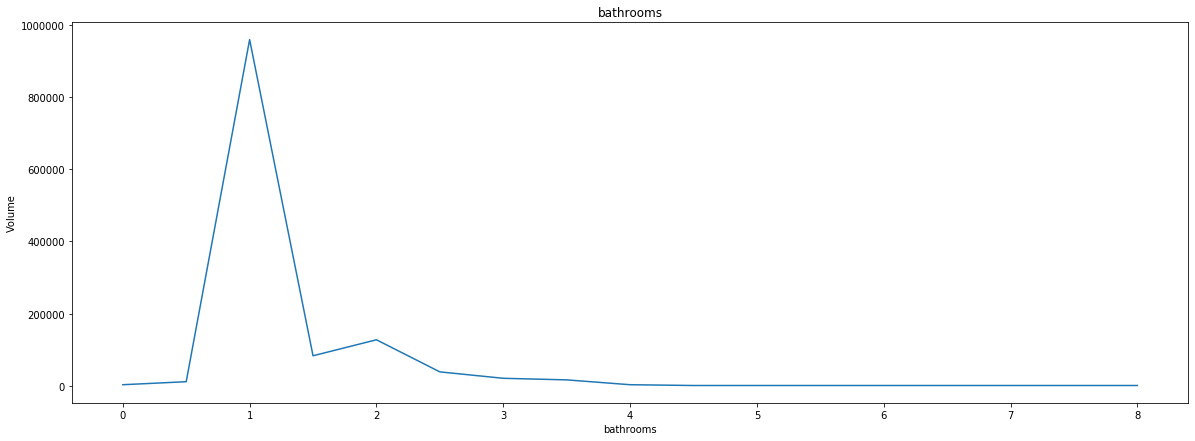

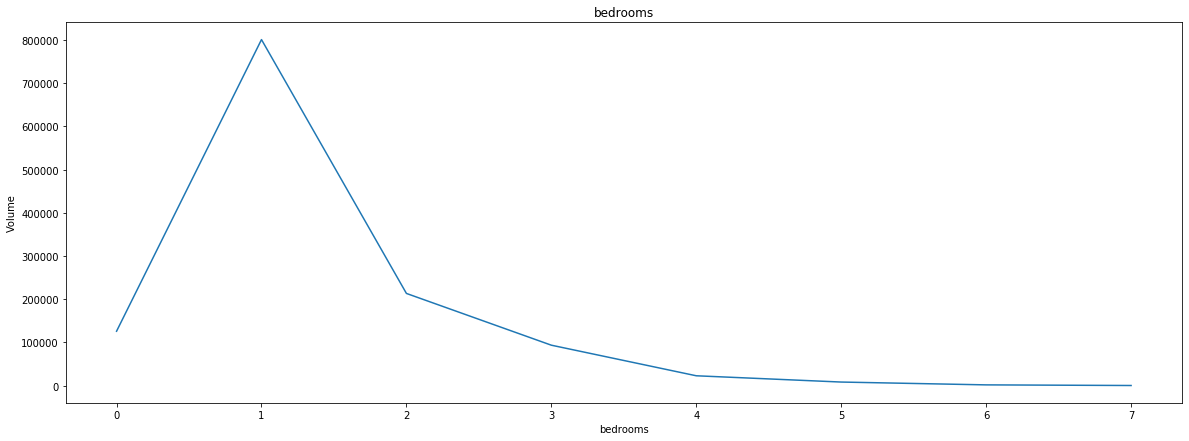

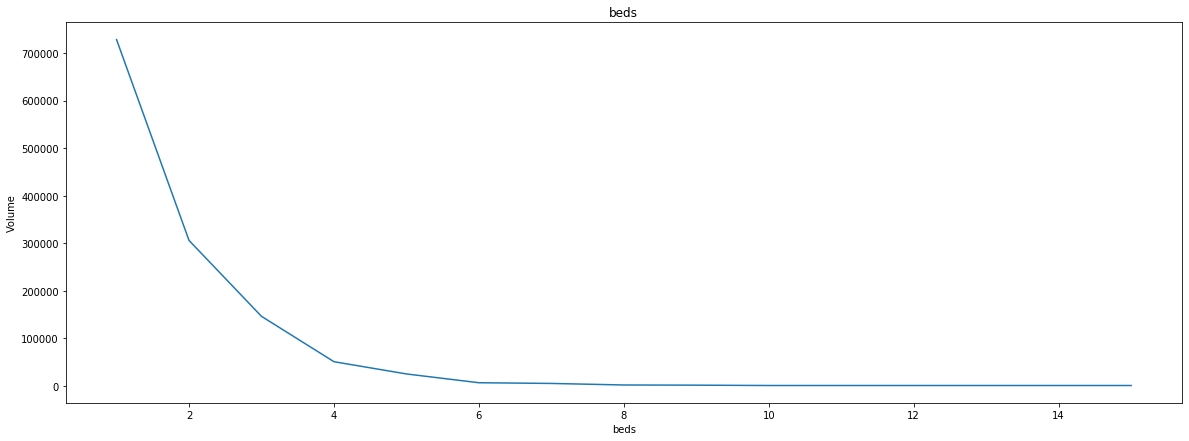

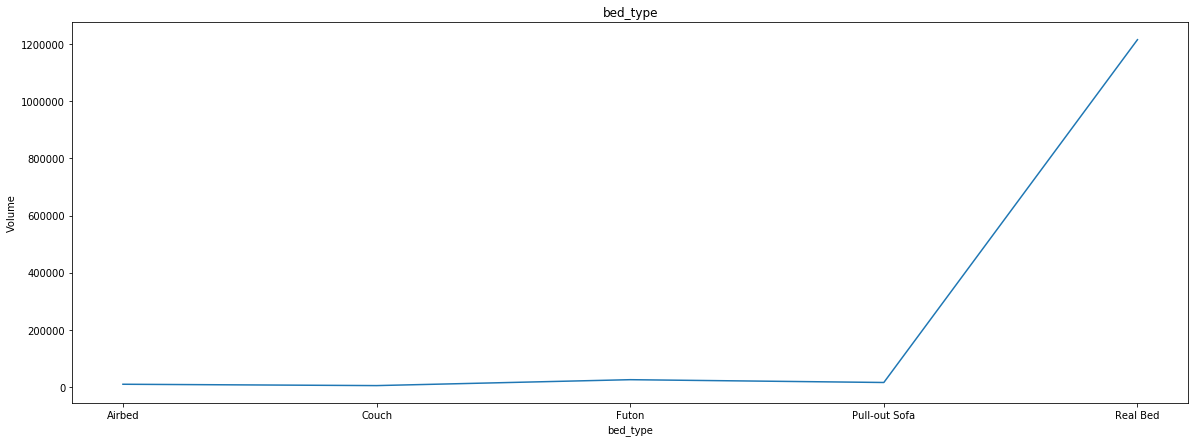

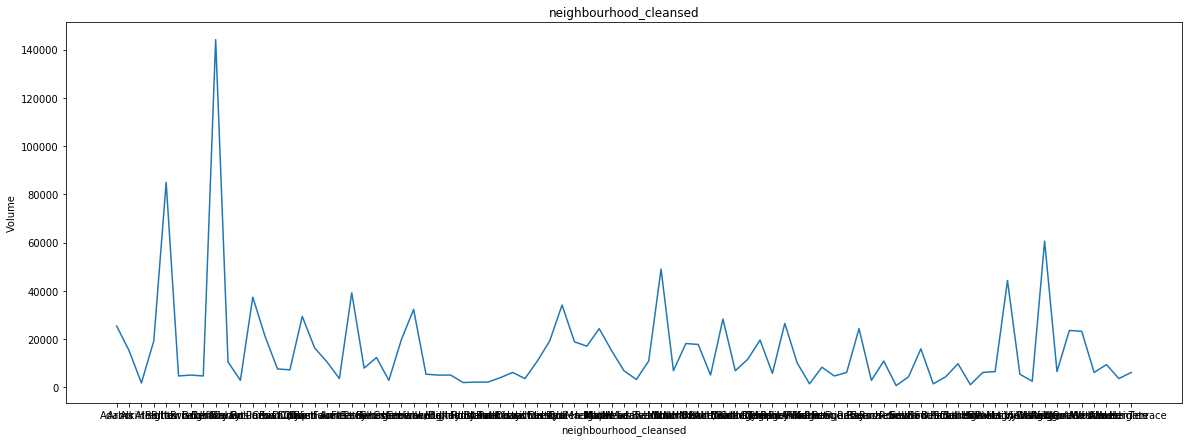

In [21]:
#Plots

var_list = ['property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type','neighbourhood_cleansed']

for var in var_list:
    plots1 = price_checks3.groupby(var).size()

    plt.figure(1, figsize=(20, 7))
    plt.plot(plots1)
    plt.xlabel(var)
    plt.ylabel('Volume')
    plt.title(var)
    plt.show() 


Property_type and Bed_type volumes are concentrated and thus won't be good predictor variables

#### Q3: Can we fit a reasonable model to predict price? Is there a difference in the model when predicting listed price or calender price? (this price is only avaiable when the property is unoccupied)



There is one final step data prep step before the data is ready for building a model - create dummy's for the categorical variables - this wasn't done in the previous sections because I wanted to see the plots by variable and not by dummies for that variable. For that reason, the creation of the dummies is done here in the modelling sections. 

In [26]:
#Create dummy variables for year_month, room_type and neighbourhood_cleansed

model_data = price_checks3[['price_c','price_l','year_month','room_type','neighbourhood_cleansed','accommodates','room_type','bathrooms','bedrooms','beds','neighbourhood_cleansed','available']]

cat_vars_to_dummy = ['year_month','room_type','neighbourhood_cleansed']
for var in  cat_vars_to_dummy:
    #for each cat add dummy var, drop original column
    model_data = pd.concat([model_data.drop(var, axis=1), pd.get_dummies(model_data[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
model_data

,price_c,price_l,accommodates,bathrooms,bedrooms,beds,available,year_month_201602,year_month_201603,year_month_201604,...,neighbourhood_cleansed_Victory Heights,neighbourhood_cleansed_View Ridge,neighbourhood_cleansed_Wallingford,neighbourhood_cleansed_Wedgwood,neighbourhood_cleansed_West Queen Anne,neighbourhood_cleansed_West Woodland,neighbourhood_cleansed_Westlake,neighbourhood_cleansed_Whittier Heights,neighbourhood_cleansed_Windermere,neighbourhood_cleansed_Yesler Terrace
0,NaN,120.0,4,1.0,2.0,2.0,f,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,120.0,4,1.0,2.0,2.0,f,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,120.0,4,1.0,2.0,2.0,f,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,120.0,4,1.0,2.0,2.0,f,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,120.0,4,1.0,2.0,2.0,f,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276566,43.0,43.0,2,1.0,1.0,2.0,t,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1276567,43.0,43.0,2,1.0,1.0,2.0,t,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1276568,43.0,43.0,2,1.0,1.0,2.0,t,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1276569,43.0,43.0,2,1.0,1.0,2.0,t,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Since we wan't to see the difference in the model between the available and unaivalble properties, the data is split in two and a model is fitted on each of these segments. The occupied data only has price_l populated while the unoccupied data has both price_c and price_l populated

In [63]:
occupied_data = model_data[model_data['available']=='f']
unoccupied_data = model_data[model_data['available']=='t']

Fit model on the data where the property is occupied (unavailable), split these data into and train and test set and check the model predictability on the training and test set

In [64]:
# Fit model on occupied data

X_oc = occupied_data.drop(columns=['price_c','price_l','available'])
y_oc = occupied_data['price_l']

X_oc_train, X_oc_test, y_oc_train, y_oc_test = train_test_split(X_oc, y_oc, test_size = 0.3, random_state=100)

## Fit model

lm_model_oc = LinearRegression(normalize=True) 
lm_model_oc.fit(X_oc_train, y_oc_train) 

y_oc_train_preds = lm_model_oc.predict(X_oc_train)
y_oc_test_preds = lm_model_oc.predict(X_oc_test)

r2_oc_train = r2_score(y_oc_train, y_oc_train_preds)
r2_oc_test = r2_score(y_oc_test, y_oc_test_preds)
print(r2_oc_train,r2_oc_test)


0.5847672808616844 0.5739049435153052


Model fits reasonably well and generalises well into the test set. The model is therefore not over fitted.

Next - fit the model on the unoccupied (available) data, again split the data into a train and test set and check the model predictability on the training and test set

In [65]:
# Fit model on unoccupied data

X_unoc = unoccupied_data.drop(columns=['price_c','price_l','available'])
y_unoc = unoccupied_data['price_c']

X_unoc_train, X_unoc_test, y_unoc_train, y_unoc_test = train_test_split(X_unoc, y_unoc, test_size = 0.3, random_state=100)

## Fit model

lm_model_unoc = LinearRegression(normalize=True) 
lm_model_unoc.fit(X_unoc_train, y_unoc_train) 

y_unoc_train_preds = lm_model_unoc.predict(X_unoc_train)
y_unoc_test_preds = lm_model_unoc.predict(X_unoc_test)

r2_unoc_train = r2_score(y_unoc_train, y_unoc_train_preds)
r2_unoc_test = r2_score(y_unoc_test, y_unoc_test_preds)
print(r2_unoc_train,r2_unoc_test)


0.629465644905234 0.6307748662246051


Model filts well and there is no overfitting of the model - R2 remains stable on the test set

Next - apply out the model Predictions to the occupied and unoccupied data. 

In [66]:
# Apply the two models back to the full data and analyse
oc_preds = lm_model_oc.predict(X_oc)
unoc_preds = lm_model_unoc.predict(X_unoc)
oc_preds1 = lm_model_oc.predict(X_unoc)

occupied_data['Price_pred_oc'] = oc_preds
unoccupied_data['Price_pred_unoc'] = unoc_preds
unoccupied_data['Price_pred_oc'] = oc_preds1


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

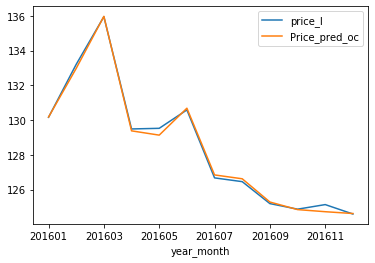

In [67]:
#ococupied Predictions

months = price_checks3['year_month']

check_preds = occupied_data.join(months)
check_preds = check_preds[['year_month','price_l','Price_pred_oc']]
price_preds = check_preds.groupby('year_month')[['price_l','Price_pred_oc']].mean()
price_preds.plot()


On the occupied/ unavailable properties, the data fits very well. Only the listed price can be predicted on this segment. The model fits well against the actuals. 
An interesting observation from this plot is that it looks like prices are decreasing over the year of 2016 for occupied properties. This is pointing to potential oversupply of AirBnBs in Seattle and potential over pricing of the available properties. This is discussed further in the blog post. 

#### Q4: What can the models tell us about prices on the available properties 

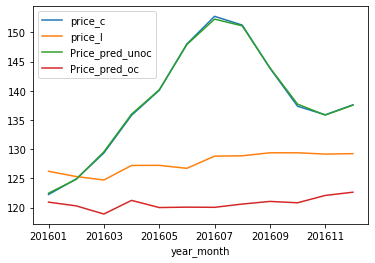

In [68]:
#Uncocupied Predictions

check_preds = unoccupied_data.join(months)
check_preds = check_preds[['year_month','price_c','price_l','Price_pred_unoc','Price_pred_oc']]
price_preds = check_preds.groupby('year_month')[['price_c','price_l','Price_pred_unoc','Price_pred_oc']].mean()
price_preds.plot()


Comparing the listing prices to the price from occupied model when applied to the un-occupied population, it seems that these price listings are a bit higher (around 4% higher). The available properties are thus potentialyl overpriced. Dropping the price of these listings by 4% might give a higher rate of occupancy for these properties. 

#### Q2 (Revisited): What characteristics are the most important determination of price in Seatle?

This section fits the regressions using statsmodels - this package allows the regression statistical output to be viewed. The most important variables can then be identified. Looking at the regression outputs below, it looks like bedrooms and bathrooms are key factors for determining price in Seattle. 

In [71]:
import statsmodels.api as sm

X_oc_train1 = sm.add_constant(X_oc_train)
model = sm.OLS(y_oc_train, X_oc_train1).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                price_l   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     4193.
Date:                Sun, 27 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:46:25   Log-Likelihood:            -1.6070e+06
No. Observations:              294577   AIC:                         3.214e+06
Df Residuals:                  294477   BIC:                         3.215e+06
Df Model:                          99                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [70]:
X_unoc_train1 = sm.add_constant(X_unoc_train)
model = sm.OLS(y_unoc_train, X_unoc_train1).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                price_c   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                 1.020e+04
Date:                Sun, 27 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:44:36   Log-Likelihood:            -3.3205e+06
No. Observations:              594127   AIC:                         6.641e+06
Df Residuals:                  594027   BIC:                         6.642e+06
Df Model:                          99                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------